<a href="https://colab.research.google.com/github/YasmineeBa/TAI_TPs/blob/main/TP_1_Mesures_de_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP 1 Mesures de performance
Dans ce TP, nous aimerions avoir un premier apperçu sur les algorithmes d'apprentissage automatique. Plus précisément, nous aimerions évaluer leurs performances en utilisant les métriques suivantes:
- Matrice de conusion
- Rappel
- Précision
- Taux de FP
- Spécificité
- Courbe ROC

Les mesures devront être calculées sur la tâche de classification de nombres manuscrits.

Le travail consiste à implementer ces métriques et à les comparer avec les métriques des librairies disponibles.

Les algorithmes : K plus Proches Voisins devront être implementés.

# Importation des librairies necessaires au travail

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from numpy import random
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Pour RNC
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

# Lecture des fichiers de données à classifier
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [ ]:
# données
X = np.genfromtxt('data.csv', delimiter=',', dtype=int)
X.shape

(5000, 400)

In [ ]:
# étiquettes
Y = np.genfromtxt('labels.csv', delimiter=',', dtype=int)
Y.shape

(5000,)

affichage d'un exemple depuis notre dataset


In [ ]:
print("la donnee [2222]", X[2222])
print("l'etiquette de la donnee", Y[2222])
plt.title('letiquette =' str(Y[2222]))
plt.imshow(np.transpose(X[2222,:].reshape((20,20))))

Afficher aléatoirement quelques données de notre base

In [ ]:
plt.figure(figsize=(15,8))
for i in range(13):
    c = random.randint(X.shape[0]) #pich a random line from the dataset
    a = X[c,:].reshape((20, 20)) #shape of one number in the image
    a=np.transpose(a) # la transposé (rendre les ligne des colonne et vice versa)
    plt.subplot(1,13,i+1)
    plt.title('label '+ str(Y[c]))
    plt.imshow(a,cmap='gray')

Notons que l'étiquette 10 concerne le chiffre 0. L'étiquette a été utilisée ainsi afin de faciliter les calculs conséquents.

In [ ]:
  #changer l'etiqute 10  qui a la valeur 0 par 0
  Y[Y == 10]= 0

# Implémentation des métriques demandées
Ici il faut écrire les fonctions, puis les appeler dans la suite du code

In [ ]:
def ConfusionMatrix(actual, predict):
  k = len(set(actual))# Number of classes
  confusionMatrix = np.zeros(shape=(k,k), dtype= np.uint)

  for i in range(len(actual)):
    confusionMatrix[actual[i]][predict[i]] += 1

  return confusionMatrix

#with sklearn bib
from sklearn.metrics import confusion_matrix

y_actual = [0, 1, 2, 0, 1, 2, 0, 1, 2]
y_predict = [0, 0, 0, 0, 1, 1, 0, 2, 2]

Y1 = confusion_matrix(y_actual, y_predict) # with library
Y2 = ConfusionMatrix(y_actual, y_predict)   # with scratch
print('Matrice de confusion avec sklearn lib:\n')
print(Y1)
print('Matrice de confusion \n')
print(Y2)





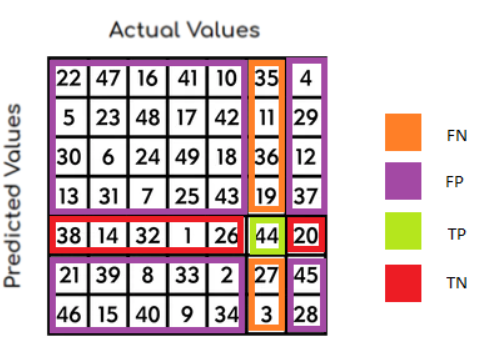

In [ ]:

def Metrics(m, classeid):

  TP = m[classeid][classeid]
  TN = m.sum() - ( m.sum(axis=0)[classeid] + m[classeid].sum() ) + TP
  FP = sum(m[classeid]) - TP
  FN = m.sum(axis=0) [classeid] - TP
  return {"TP" : TP , "FP" : FP , "TN" : TN , "FN" : FN }


- Rappel :

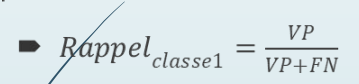

In [ ]:
def Rappel(m, classeid):
  metrics = Metrics(m, classeid)
  TP = metrics['TP']
  FN = metrics['FN']
  return TP / (TP + FN)

In [ ]:
#test

y_actual = [0, 1, 2, 0, 1, 2, 0, 1, 2]
y_predict = [0, 0, 0, 0, 1, 1, 0, 2, 2]

Y1 = ConfusionMatrix(y_actual, y_predict)
#classe de 3
print("Rappel de la Classe 0 : {0}".format(Rappel(Y1,0)))
print("Rappel de la Classe 1 : {0}".format(Rappel(Y1,1)))
print("Rappel de la classe 2 : {0}".format(Rappel(Y1, 2)))



- Précision

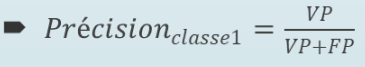

In [ ]:
def Precision(m, classeid):

  metrics = Metrics(m, classeid)
  TP = metrics['TP']
  FP = metrics['FP']

  return TP / (TP + FP)



In [ ]:
#test

y_actual = [0, 1, 2, 0, 1, 2, 0, 1, 2]
y_predict = [0, 0, 0, 0, 1, 1, 0, 2, 2]

Y1 = ConfusionMatrix(y_actual, y_predict)
#classe de 3
print("Precision de la Classe 0 : {0}".format(Precision(Y1,0)))
print("Precision de la Classe 1 : {0}".format(Precision(Y1,1)))
print("Precision de la classe 2 : {0}".format(Precision(Y1, 2)))


In [ ]:
def Accurency(m,classeid):
  metrics = Metrics(m,classeid)
  TN = metrics['TN']
  FP = metrics['FP']
  TP = metrics['TP']
  FN = metrics['FN']

  return (TP+TN)/(TP+TN+FN+FP)

- Taux de FP

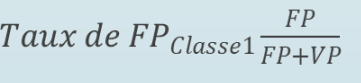

In [ ]:
def TFP(m, classeid):
  metrics = Metrics(m, classeid)
  FP = metrics['FP']
  TP = metrics['TP']

  return FP /(FP + TP)


In [ ]:
#test

y_actual = [0, 1, 2, 0, 1, 2, 0, 1, 2]
y_predict = [0, 0, 0, 0, 1, 1, 0, 2, 2]

Y1 = ConfusionMatrix(y_actual, y_predict)
#classe de 3
print("Taux de FP de la Classe 0 : {0}".format(TFP(Y1,0)))
print("Taux de FP de la Classe 1 : {0}".format(TFP(Y1,1)))
print("Taux de FP de la classe 2 : {0}".format(TFP(Y1, 2)))

- Spécificité

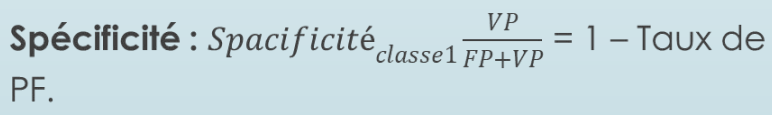

In [ ]:
def Specificite(m, classeid):
  metrics = Metrics(m , classeid)
  TN = metrics['TN']
  FP = metrics['FP']
  return TN / (TN + FP)

def Specificite2(m , classeid):
  FP = TFP(m, classeid)
  return 1 - FP

In [ ]:
#test
#Test
y_actual = [0, 1, 2, 0, 1, 2, 0, 1, 2]
y_predict = [0, 0, 0, 0, 1, 1, 0, 2, 2]


print("Scartch Version : ")
print("Specificite de la Classe 0 : {0}".format(Specificite(Y1,0)))
print("Specificite de la Classe 1 : {0}".format(Specificite(Y1,1)))
print("Specificite de la Classe 2 : {0}".format(Specificite(Y1,2)))

- Courbe ROC

In [ ]:
def TPR(M,idClasse):
  metrics = Metrics(M,idClasse)
  TN = metrics['TN']
  FN = metrics['FN']
  return TN/(TN+FN)

def FPR(M,idClasse):
  metrics = Metrics(M,idClasse)
  FP = metrics['FP']
  TP = metrics['TP']
  return FP/(FP+TP)


def roc_binnary(probabilities, y_test, partitions=100):
    roc = np.array([])
    for i in range(partitions + 1):
        threshold_vector = np.greater_equal(probabilities, i / partitions).astype(int)
        M = ConfusionMatrix(y_test,threshold_vector)
        tpr = TPR(M,0)
        fpr = FPR(M,0)
        roc = np.append(roc, [fpr, tpr])
    return roc.reshape(-1, 2)

def roc_multiclasses(probabilities, y_test, idClasse,partitions=100):
  probabilities_copie = np.copy(probabilities[:,idClasse])
  y_test_copie = np.copy(y_test)

  y_test_copie[y_test_copie != idClasse] = -1
  y_test_copie[y_test_copie == idClasse] =  1
  y_test_copie[y_test_copie ==       -1] =  0

  roc = np.array([])
  for i in range(partitions+1):
      threshold_vector = np.greater_equal(probabilities_copie, i / partitions).astype(int)
      M = ConfusionMatrix(y_test_copie,threshold_vector)
      tpr = TPR(M,0)
      fpr = FPR(M,0)
      roc = np.append(roc, [fpr, tpr])
  return roc.reshape(-1, 2)

def plot_roc(ROC,title):
  fig, (ax1, ax2 , ax3 , ax4 , ax5 ) = plt.subplots(1, 5, figsize = (15,3),sharex=True, sharey=True)
  fig.suptitle(title)
  ax1.plot(ROC[0][:,0],ROC[0][:,1],color="darkorange")
  ax1.set_title("Classe 0")
  ax1.plot([0, 1], [0, 1], color="navy", linestyle="--")

  ax2.set_title("Classe 1")
  ax2.plot(ROC[1][:,0],ROC[1][:,1],color="darkorange")
  ax2.plot([0, 1], [0, 1], color="navy", linestyle="--")

  ax3.set_title("Classe 2")
  ax3.plot(ROC[2][:,0],ROC[2][:,1],color="darkorange")
  ax3.plot([0, 1], [0, 1], color="navy", linestyle="--")

  ax4.set_title("Classe 3")
  ax4.plot(ROC[3][:,0],ROC[3][:,1],color="darkorange")
  ax4.plot([0, 1], [0, 1], color="navy", linestyle="--")

  ax5.set_title("Classe 4")
  ax5.plot(ROC[4][:,0],ROC[4][:,1],color="darkorange")
  ax5.plot([0, 1], [0, 1], color="navy", linestyle="--")

  fig, (ax1, ax2 , ax3 , ax4 , ax5 ) = plt.subplots(1, 5, figsize = (15,3))


  ax1.set_title("Classe 5")
  ax1.plot(ROC[5][:,0],ROC[5][:,1],color="darkorange")
  ax1.plot([0, 1], [0, 1], color="navy", linestyle="--")

  ax2.set_title("Classe 6")
  ax2.plot(ROC[6][:,0],ROC[6][:,1],color="darkorange")
  ax2.plot([0, 1], [0, 1], color="navy", linestyle="--")

  ax3.set_title("Classe 7")
  ax3.plot(ROC[7][:,0],ROC[7][:,1],color="darkorange")
  ax3.plot([0, 1], [0, 1], color="navy", linestyle="--")

  ax4.set_title("Classe 8")
  ax4.plot(ROC[8][:,0],ROC[8][:,1],color="darkorange")
  ax4.plot([0, 1], [0, 1], color="navy", linestyle="--")

  ax5.set_title("Classe 9")
  ax5.plot(ROC[9][:,0],ROC[9][:,1],color="darkorange")
  ax5.plot([0, 1], [0, 1], color="navy", linestyle="--")

In [ ]:
#Test
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt


#generation des donnees etiqueter aleatoirement
x, y = make_classification(n_samples=1000, n_informative=10, n_features=20, flip_y=0.2)
#division du data en donnees de entainement et donnees de test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#creer le model
model = RandomForestClassifier()

#entrainer le model
model.fit(X_train, y_train)

#vecteur de probabilités
prob_vector = model.predict_proba(X_test)[:, 1]

#calculer la courbe de ROC ( 100 partition par defaut .. thVext : [0.01,0.02,..,0.99] )
ROC = roc_binnary(prob_vector,y_test)

#afficher la courbe
plt.scatter(ROC[:,0],ROC[:,1],color='#0F9D58')
plt.title('ROC Curve',fontsize=10)
plt.xlabel('False Positive Rate',fontsize=8)
plt.ylabel('True Positive Rate',fontsize=8)
plt.show()


#avec la library sklearn
fpr, tpr, thresholds = roc_curve(y_test, prob_vector)
plt.scatter(fpr,tpr,color="blue")
plt.title('ROC Curve',fontsize=10)
plt.xlabel('False Positive Rate',fontsize=8)
plt.ylabel('True Positive Rate',fontsize=8)
plt.show()

# Classification

Définir d'abord la base d'entrainement Xt, Yt et la base de test Xtt, Ytt

In [ ]:
tRatio=2/3
ttRatio=1/3

Y[Y == 10] = 0
# implementer la division
X_t, X_tt, Y_t, Y_tt = train_test_split(X, Y, test_size=1/3)

print("size of Xt  : {0}".format(X_t.shape)) #X_train
print("size of Xtt : {0}".format(X_tt.shape)) #X_test
print("size of Yt  : {0}".format(Y_t.shape))
print("size of Ytt : {0}".format(Y_tt.shape))

# Méthode 0: K- Plus Proches Voisins

Ici il faudra implémenter la méthode, puis la tester et vérifier les métriques en variant le nombre K

In [ ]:
#def KPP(x,X, Y):
    # Il faudra retourner l'etiquette de x, en le comparant à toutes les données de Xt, Yt


# Méthode 1: MVS
Machine à Vecteurs de Support

In [ ]:
#Créer le modèle
model= svm.SVC(kernel='linear',probability=True)
# entrainement
model.fit(X_t, Y_t)
# Prediction
y_pred = model.predict(X_tt)
y_score = model.predict_proba(X_tt)

In [ ]:
# tester une image
c= 3
y_pred[c]
print("predicted calsse : {0} , with {1} as probability".format(y_pred[c],y_score[c][y_pred[c]]))

a = X_tt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Y_tt[c]))
plt.imshow(a,cmap='gray')

In [ ]:
CM = ConfusionMatrix(Y_tt,y_pred)
print(CM)
print()
for i in range(10):
  print("Classe {0}".format(i))
  print("\tAccurency de la classe {0} : {1}".format(i,Accurency(CM,i)))
  print("\tPrecision de la classe {0} : {1}".format(i,Precision(CM,i)))
  print("\tTaux de FP de la classe {0} : {1}".format(i,TFP(CM,i)))
  print("\tSpecificite de la classe {0} : {1}".format(i,Specificite(CM,i)))

print()

ROCs = []
for i in range(10):
  ROC = roc_multiclasses(y_score,Y_tt,i)
  ROCs.append(ROC)
plot_roc(ROCs," ")

# Méthode 2: Arbres de décision


In [ ]:
# Créer le modèle
model = DecisionTreeClassifier()
# Entrainer le modèle
model = model.fit(X_t, Y_t)
# Prediction
y_pred = model.predict(X_tt)
y_score = model.predict_proba(X_tt)

In [ ]:
# tester une image
c= 3
print("predicted calsse : {0} , with {1} as probability".format(y_pred[c],y_score[c][y_pred[c]]))
a = X_tt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Y_tt[c]))
plt.imshow(a,cmap='gray')

In [ ]:
CM = ConfusionMatrix(Y_tt,y_pred)
print(CM)
print()
for i in range(10):
  print("Classe {0}".format(i))
  print("Accurency de la classe {0} : {1}".format(i,Accurency(CM,i)))
  print("Precision de la classe {0} : {1}".format(i,Precision(CM,i)))
  print("Taux de FP de la classe {0} : {1}".format(i,TFP(CM,i)))
  print("Specificite de la classe {0} : {1}".format(i,Specificite(CM,i)))

print()

ROCs = []
for i in range(10):
  ROC = roc_multiclasses(y_score,Y_tt,i)
  ROCs.append(ROC)
plot_roc(ROCs," ")

# Méthode 3: RN
Réseaux de neurones Perceptron

In [ ]:
model = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(25),max_iter=100000)
X_t, X_tt, Y_t, Y_tt = train_test_split(X, Y, random_state=0, test_size=0.7)
model.fit(X_t, Y_t)
# Prediction
y_pred = model.predict(X_tt)
y_score = model.predict_proba(X_tt)

In [ ]:
# tester une image
c= 3
print("predicted calsse : {0} , with {1} as probability".format(y_pred[c],y_score[c][y_pred[c]]))
a = X_tt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Y_tt[c]))
plt.imshow(a,cmap='gray')

In [ ]:
model.predict([X_tt[c,:]])

In [ ]:
# pour ROC, il faudra les probabilités:
model.predict_proba([X_tt[c,:]])

In [ ]:
CM = ConfusionMatrix(Y_tt,y_pred)
print(CM)
print()
for i in range(10):
  print("Classe {0}".format(i))
  print("\tAccurency de la classe {0} : {1}".format(i,Accurency(CM,i)))
  print("\tPrecision de la classe {0} : {1}".format(i,Precision(CM,i)))
  print("\tTaux de FP de la classe {0} : {1}".format(i,TFP(CM,i)))
  print("\tSpecificite de la classe {0} : {1}".format(i,Specificite(CM,i)))

print()

ROCs = []
for i in range(10):
  ROC = roc_multiclasses(y_score,Y_tt,i)
  ROCs.append(ROC)
plot_roc(ROCs," ")

Afficher l'image testée

In [ ]:
a = Xtt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Ytt[c]))
plt.imshow(a,cmap='gray')

# Méthode 4: RNC
Réseaux de Neurones Convolutifs

In [ ]:
# reshape dataset to have a single channel
Xt, Xtt, Yt, Ytt = train_test_split(X, Y, random_state=0, test_size=0.7)

Xt_rnc = Xt.reshape((Xt.shape[0], 20, 20, 1))
Xtt_rnc = Xtt.reshape((Xtt.shape[0], 20, 20, 1))

In [ ]:
# Recoder le valeurs
Yt_rnc = to_categorical(Yt)
Ytt_rnc = to_categorical(Ytt)

Xt_rncN = Xt_rnc.astype('float32')
Xtt_rncN = Xtt_rnc.astype('float32')

# normaliser
Xt_rncN = Xt_rncN / 255.0
Xtt_rncN = Xtt_rncN / 255.0

# definir le modèle RNC
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(20, 20, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compiler le modèle
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# evaluaer le modèle
_, acc = model.evaluate(Xtt_rncN, Ytt_rnc, verbose=0)


# Appliquer les métriques implementées pour voir le résultat

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 4 Mars 2022 à 22h

La partie RNC peut être laissée pour le prochain TP

In [ ]:
# bonne chance